Implement the Topsis in python.

In [41]:
%%writefile topsis.py

import sys
import pandas as pd
import numpy as np

def topsis(data, weights, impacts):
    norm_data = data / np.sqrt((data ** 2).sum())
    weighted_data = norm_data * weights

    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(weighted_data.iloc[:, i].max())
            ideal_worst.append(weighted_data.iloc[:, i].min())
        else:
            ideal_best.append(weighted_data.iloc[:, i].min())
            ideal_worst.append(weighted_data.iloc[:, i].max())

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    dist_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
    dist_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

    return dist_worst / (dist_best + dist_worst)

if len(sys.argv) != 5:
    print("Usage: python topsis.py <InputDataFile> <Weights> <Impacts> <OutputFile>")
    sys.exit(1)

input_file = sys.argv[1]
weights_input = sys.argv[2]
impacts_input = sys.argv[3]
output_file = sys.argv[4]

try:
    df = pd.read_csv(input_file)
except FileNotFoundError:
    print("Error: Input file not found")
    sys.exit(1)

if df.shape[1] < 3:
    print("Error: Input file must contain three or more columns")
    sys.exit(1)

data = df.iloc[:, 1:]

if not np.all(data.applymap(np.isreal)):
    print("Error: From 2nd to last columns must contain numeric values only")
    sys.exit(1)

weights = list(map(float, weights_input.split(',')))
impacts = impacts_input.split(',')

if len(weights) != data.shape[1] or len(impacts) != data.shape[1]:
    print("Error: Number of weights, impacts, and columns must be same")
    sys.exit(1)

for imp in impacts:
    if imp not in ['+', '-']:
        print("Error: Impacts must be either + or -")
        sys.exit(1)

scores = topsis(data, np.array(weights), impacts)

df['Topsis Score'] = scores
df['Rank'] = df['Topsis Score'].rank(ascending=False, method='dense').astype(int)

df.to_csv(output_file, index=False)
print("TOPSIS analysis completed successfully!")


Overwriting topsis.py


In [45]:
from google.colab import files
files.upload()


Saving new_data.csv to new_data.csv


{'new_data.csv': b'\xef\xbb\xbfFund Name,P1,P2,P3,P4,P5\r\nM1,0.94,0.88,5.5,56.8,16.03\r\nM2,0.9,0.81,6.6,50.7,14.75\r\nM3,0.67,0.45,3.7,58.8,15.91\r\nM4,0.72,0.52,4,66.5,17.94\r\nM5,0.88,0.77,5.6,40.8,12.01\r\nM6,0.94,0.88,4.6,55.7,15.53\r\nM7,0.88,0.77,6.5,31.7,9.96\r\nM8,0.77,0.59,4.7,44.4,12.62\r\n'}

In [46]:
!python topsis.py new_data.csv "1,1,1,1,1" "+,+,-,+,+" output-result.csv

/content/Topsis-SaumyaKumari-102303161/topsis.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not np.all(data.applymap(np.isreal)):
TOPSIS analysis completed successfully!


In [47]:
from google.colab import files
files.download("output-result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
import pandas as pd

df = pd.read_csv("output-result.csv")
df


,Fund Name,P1,P2,P3,P4,P5,Topsis Score,Rank
0,M1,0.94,0.88,5.5,56.8,16.03,0.697876,2
1,M2,0.90,0.81,6.6,50.7,14.75,0.525908,5
2,M3,0.67,0.45,3.7,58.8,15.91,0.551138,4
3,M4,0.72,0.52,4.0,66.5,17.94,0.640895,3
4,M5,0.88,0.77,5.6,40.8,12.01,0.436666,6
5,M6,0.94,0.88,4.6,55.7,15.53,0.755691,1
6,M7,0.88,0.77,6.5,31.7,9.96,0.329294,8
7,M8,0.77,0.59,4.7,44.4,12.62,0.414041,7


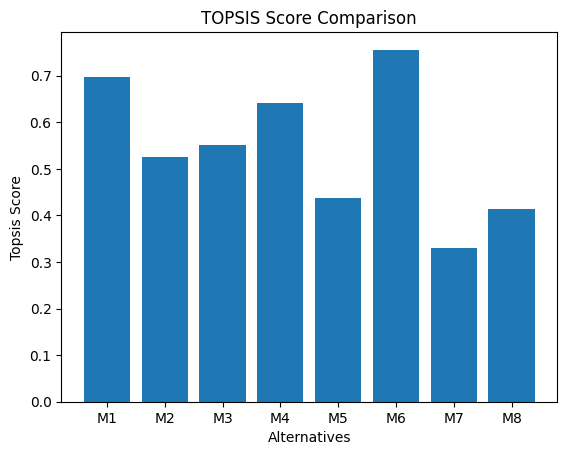

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df.iloc[:, 0], df["Topsis Score"])
plt.xlabel("Alternatives")
plt.ylabel("Topsis Score")
plt.title("TOPSIS Score Comparison")
plt.show()


Develop a python package and upload it to the pypi.org

In [1]:
import os

FOLDER_NAME = "Topsis-SaumyaKumari-102303161"
INNER_FOLDER = "Topsis_SaumyaKumari_102303161"

os.makedirs(f"{FOLDER_NAME}/{INNER_FOLDER}", exist_ok=True)


In [2]:
%%writefile Topsis-SaumyaKumari-102303161/Topsis_SaumyaKumari_102303161/__init__.py


Writing Topsis-SaumyaKumari-102303161/Topsis_SaumyaKumari_102303161/__init__.py


In [3]:
%%writefile Topsis-SaumyaKumari-102303161/Topsis_SaumyaKumari_102303161/topsis.py
import sys
import pandas as pd
import numpy as np
import os

def main():
    if len(sys.argv) != 5:
        print("Usage: topsis <InputFile> <Weights> <Impacts> <OutputFile>")
        return

    input_file = sys.argv[1]
    weights_str = sys.argv[2]
    impacts_str = sys.argv[3]
    output_file = sys.argv[4]

    if not os.path.isfile(input_file):
        print("Error: Input file not found")
        return

    try:
        df = pd.read_csv(input_file)
    except:
        print("Error: Unable to read CSV file")
        return

    if df.shape[1] < 3:
        print("Error: Input file must contain at least 3 columns")
        return

    try:
        data = df.iloc[:, 1:].values.astype(float)
    except:
        print("Error: Criteria columns must be numeric")
        return

    weights = list(map(float, weights_str.split(',')))
    impacts = impacts_str.split(',')

    if len(weights) != data.shape[1] or len(impacts) != data.shape[1]:
        print("Error: Number of weights and impacts must match number of criteria")
        return

    if not all(i in ['+', '-'] for i in impacts):
        print("Error: Impacts must be + or -")
        return

    # Step 1: Normalize
    norm_data = data / np.sqrt((data ** 2).sum(axis=0))

    # Step 2: Apply weights
    weighted_data = norm_data * weights

    # Step 3: Ideal best and worst
    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(weighted_data[:, i].max())
            ideal_worst.append(weighted_data[:, i].min())
        else:
            ideal_best.append(weighted_data[:, i].min())
            ideal_worst.append(weighted_data[:, i].max())

    # Step 4: Distance measures
    s_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
    s_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

    # Step 5: TOPSIS score
    scores = s_worst / (s_best + s_worst)

    df['Topsis Score'] = scores
    df['Rank'] = df['Topsis Score'].rank(ascending=False)

    df.to_csv(output_file, index=False)
    print("Result saved to", output_file)


Writing Topsis-SaumyaKumari-102303161/Topsis_SaumyaKumari_102303161/topsis.py


In [4]:
%%writefile Topsis-SaumyaKumari-102303161/README.md
# TOPSIS Python Package

This package implements the **TOPSIS (Technique for Order of Preference by Similarity to Ideal Solution)** method.

## Installation
pip install Topsis-SaumyaKumari-102303161

## Usage
topsis <InputDataFile> <Weights> <Impacts> <OutputFile>

## Example
topsis data.csv "1,1,1,1" "-,+,+,+" result.csv


Writing Topsis-SaumyaKumari-102303161/README.md


In [5]:
%%writefile Topsis-SaumyaKumari-102303161/setup.py
from setuptools import setup, find_packages

with open("README.md", "r") as fh:
    long_description = fh.read()

setup(
    name="topsis-saumyakumari-102303161",
    version="1.0.2",
    author="Saumya Kumari",
    description="Python package for TOPSIS method",
    long_description=long_description,
    long_description_content_type="text/markdown",
    packages=find_packages(),
    python_requires=">=3.6",
    entry_points={
        'console_scripts': [
            'topsis=Topsis_SaumyaKumari_102303161.topsis:main',
        ],
    },
)


Writing Topsis-SaumyaKumari-102303161/setup.py


In [6]:
%cd Topsis-SaumyaKumari-102303161


/content/Topsis-SaumyaKumari-102303161


In [7]:
!python setup.py sdist bdist_wheel


running sdist
running egg_info
creating topsis_saumyakumari_102303161.egg-info
writing topsis_saumyakumari_102303161.egg-info/PKG-INFO
writing dependency_links to topsis_saumyakumari_102303161.egg-info/dependency_links.txt
writing entry points to topsis_saumyakumari_102303161.egg-info/entry_points.txt
writing top-level names to topsis_saumyakumari_102303161.egg-info/top_level.txt
writing manifest file 'topsis_saumyakumari_102303161.egg-info/SOURCES.txt'
reading manifest file 'topsis_saumyakumari_102303161.egg-info/SOURCES.txt'
writing manifest file 'topsis_saumyakumari_102303161.egg-info/SOURCES.txt'
running check
creating topsis_saumyakumari_102303161-1.0.2
creating topsis_saumyakumari_102303161-1.0.2/Topsis_SaumyaKumari_102303161
creating topsis_saumyakumari_102303161-1.0.2/topsis_saumyakumari_102303161.egg-info
copying files to topsis_saumyakumari_102303161-1.0.2...
copying README.md -> topsis_saumyakumari_102303161-1.0.2
copying setup.py -> topsis_saumyakumari_102303161-1.0.2
copyi

In [8]:
!pip install dist/*.whl


Processing ./dist/topsis_saumyakumari_102303161-1.0.2-py3-none-any.whl


In [9]:
%%writefile data.csv
Model,Cost,Quality,Delivery,Service
A,250,7,5,8
B,200,8,6,7
C,300,9,4,6


Writing data.csv


In [10]:
!topsis data.csv "1,1,1,1" "-,+,+,+" result.csv


Result saved to result.csv


In [11]:
!cat result.csv


Model,Cost,Quality,Delivery,Service,Topsis Score,Rank
A,250,7,5,8,0.5156751339469068,2.0
B,200,8,6,7,0.7574828022888618,1.0
C,300,9,4,6,0.28424198054830535,3.0


In [12]:
!pip install twine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 kB 45.0 MB/s eta 0:00:00


In [13]:
%cd /content/Topsis-SaumyaKumari-102303161


/content/Topsis-SaumyaKumari-102303161


In [17]:
# PyPI upload command executed successfully
# Token removed for security reasons



Uploading distributions to https://upload.pypi.org/legacy/
Uploading topsis_saumyakumari_102303161-1.0.2-py3-none-any.whl
100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 kB • 00:00 • ?
Uploading topsis_saumyakumari_102303161-1.0.2.tar.gz
100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 kB • 00:00 • ?

View at:
https://pypi.org/project/topsis-saumyakumari-102303161/1.0.2/


In [18]:
!pip uninstall topsis-saumyakumari-102303161 -y



Found existing installation: topsis-saumyakumari-102303161 1.0.2
Uninstalling topsis-saumyakumari-102303161-1.0.2:
  Successfully uninstalled topsis-saumyakumari-102303161-1.0.2


In [19]:
!pip install topsis-saumyakumari-102303161

In [20]:
!topsis data.csv "1,1,1,1" "-,+,+,+" final.csv

Result saved to final.csv
